# Lecture 13 Examples

In [7]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.stats import shapiro, bartlett
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf

import pymannkendall as mk

# Phosphorus

## Load

In [5]:
data_file = '../Data/samsonvillebrook_phosphorus_quarterly.txt'
df = pandas.read_table(data_file, delim_whitespace=True, names=['time','P'])
df.set_index('time', inplace=True)
df.head()

,P
time,
1,0.180
5,0.200
9,0.250
13,0.068
17,0.201


## Plot

<AxesSubplot:xlabel='time'>

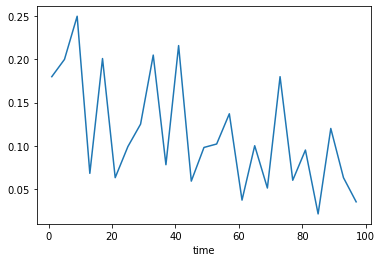

In [6]:
df.P.plot()

## Mann-Kendall

In [8]:
result = mk.original_test(df.P)
result

Mann_Kendall_Test(trend='decreasing', h=True, p=0.014143012959226597, z=-2.453610372238226, Tau=-0.35333333333333333, s=-106.0, var_s=1831.3333333333333, slope=-0.0045000000000000005, intercept=0.15300000000000002)

## Significant p-value!

## Fit linear trend

In [9]:
time = np.arange(len(df)) + 1
df['time'] = time

In [10]:
formula = "P ~ time"
mod_ols = smf.glm(formula=formula, data=df).fit()#, family=sm.families.Binomial()).fit()

In [12]:
mod_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      P   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0030759
Method:                          IRLS   Log-Likelihood:                 37.871
Date:                Mon, 09 May 2022   Deviance:                     0.070746
Time:                        10:11:20   Pearson chi2:                   0.0707
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3368
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1775      0.023      7.764      0.000       0.133       0.222
time          -0.0049      0.002     -3.191      0.001      -0.008      -0.002
==============================================================================
"""

In [13]:
mod_ols.pvalues

Intercept    8.259083e-15
time         1.417712e-03
dtype: float64

----

# Faux dataset

In [15]:
## Load

data_file2 = '../Data/pollution_data_stationY.txt'
df2 = pandas.read_table(data_file2, delim_whitespace=True)
df2.head()

,year,month,dd,y
0,2011,1,2011.08,0.31
1,2011,2,2011.15,0.38
2,2011,3,2011.23,0.41
3,2011,4,2011.31,0.39
4,2011,5,2011.38,0.31


## Date

In [16]:
dates = []
for index, row in df2.iterrows():
    dates.append(f'{int(row.year)}-{int(row.month)}')
dates = pandas.to_datetime(dates)
df2['date'] = dates
df2.set_index('date', inplace=True)
df2.head()

,year,month,dd,y
date,,,,
2011-01-01,2011,1,2011.08,0.31
2011-02-01,2011,2,2011.15,0.38
2011-03-01,2011,3,2011.23,0.41
2011-04-01,2011,4,2011.31,0.39
2011-05-01,2011,5,2011.38,0.31


## Plot

<AxesSubplot:xlabel='date'>

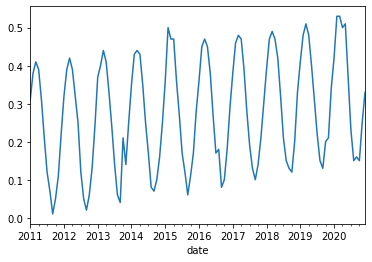

In [18]:
df2.y.plot()

## Fit with seasonal trend 

### Dummies for seasonal

In [19]:
dummy = np.zeros((len(df2), 11), dtype=int)
for i in np.arange(11):
    for j in np.arange(len(df2)):
        if df2.month.values[j] == i+1:
            dummy[j,i] = 1

In [20]:
dummies = []
for idum in np.arange(11):
    key = f'dum{idum}'
    dummies.append(key)
    df2[key] = dummy[:,idum]

In [23]:
df2.head()

,year,month,dd,y,dum0,dum1,dum2,dum3,dum4,dum5,dum6,dum7,dum8,dum9,dum10,time
date,,,,,,,,,,,,,,,,
2011-01-01,2011,1,2011.08,0.31,1,0,0,0,0,0,0,0,0,0,0,1
2011-02-01,2011,2,2011.15,0.38,0,1,0,0,0,0,0,0,0,0,0,2
2011-03-01,2011,3,2011.23,0.41,0,0,1,0,0,0,0,0,0,0,0,3
2011-04-01,2011,4,2011.31,0.39,0,0,0,1,0,0,0,0,0,0,0,4
2011-05-01,2011,5,2011.38,0.31,0,0,0,0,1,0,0,0,0,0,0,5


### Time

In [21]:
time = np.arange(len(df2)) + 1
df2['time'] = time

### Fit

In [24]:
formula = "y ~ dum0 + dum1 + dum2 + dum3 + dum4 + dum5 + dum6 + dum7 + dum8 + dum9 + dum10 + time"
ols2 = smf.glm(formula=formula, data=df2).fit()#, family=sm.families.Binomial()).fit()

In [25]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                            GLM   Df Residuals:                      107
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                      0.00042150
Method:                          IRLS   Log-Likelihood:                 302.91
Date:                Mon, 09 May 2022   Deviance:                     0.045100
Time:                        10:16:14   Pearson chi2:                   0.0451
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2094      0.007     28.223      0.000       0.195       0.224
dum0           0.0963      0.009     10.463      0.000       0.078       0.114
dum1           0.1772      0.009     19.261      0.000       0.159       0.195
dum2           0.1930      0.009     20.995      0.000       0.175       0.211
dum3           0.1719      0.009     18.704      0.000       0.154       0.190
dum4           0.1018      0.009     11.079      0.000       0.084       0.120
dum5           0.0007      0.009      0.076      0.940      -0.017       0.019
dum6          -0.1034      0.009    -11.259      0.000      -0.121      -0.085
dum7          -0.1645      0.009    -17.916      0.000      -0.183      -0.147
dum8          -0.1997      0.009    -21.742      0.000      -0.218      -0.182
dum9          -0.1568      0.009    -17.073      0.000      -0.175      -0.139
dum10         -0.1059      0.009    -11.532      0.000      -0.124      -0.088
time           0.0011   5.44e-05     20.519      0.000       0.001       0.001
==============================================================================
"""

## Plot

In [31]:
df2['ols'] = ols2.fittedvalues

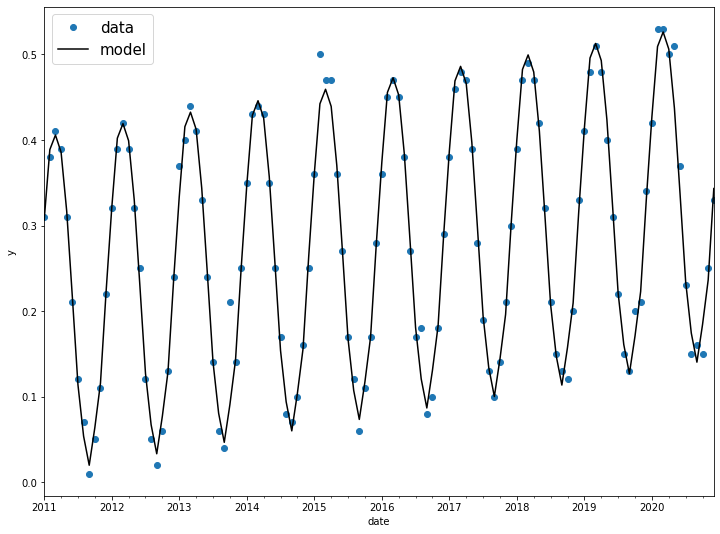

In [33]:
fig = plt.figure()
fig.set_size_inches((12, 9))
ax = df2.y.plot(ylabel='y', label='data', marker='o', ls='')
#
df2.ols.plot(ax=ax, color='k', label='model')
#
ax.legend(fontsize=15)
#
#set_fontsize(ax, 17)

## Explore residuals

### Durbin-Watson

In [27]:
resids = df2.y-ols2.fittedvalues

In [28]:
durbin_watson(resids)

2.043722938390377

### Shapiro

In [30]:
shapiro(resids)

ShapiroResult(statistic=0.763434886932373, pvalue=1.264496753833333e-12)

### Not normal!!

## Try a Seasonal MK test!

In [38]:
mk2_results = mk.seasonal_test(df2.y, period=12)

In [39]:
mk2_results

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.917227506518133, Tau=0.85, s=459.0, var_s=1477.0, slope=0.013333333333333327, intercept=0.20888888888888896)